100%|██████████| 120/120 [00:00<00:00, 168.93it/s]


(0.5555555555555556, 0, 119) (1.2857142857142858, 119, 55)


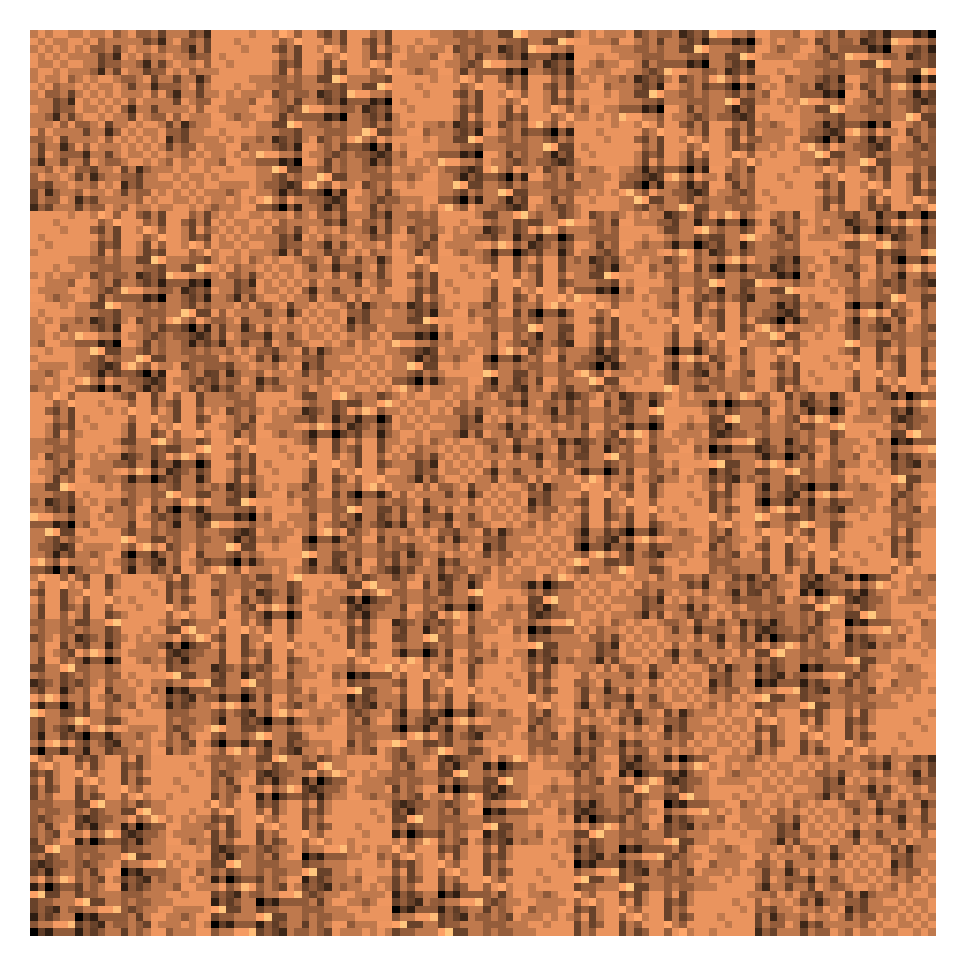

In [57]:
from itertools import chain, combinations, permutations
from tqdm import tqdm 

def m_show(m, size = 4, cmap = 'copper'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()

def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return ''.join(map(str, digits[::-1]))

def conc_or(a, b): 
    for i in range(len(b),-1,-1):
        if a[len(a)-i:]==b[:i]:
            return a[:len(a)-i]+b
    return a + b

def get_matrix_bin(s):
    n = len(s)
    mat =  [[0]*n for i in range(n)]
    for x in tqdm(range(0, n)):
        for y in range(0, x):
            f = numberToBase((s[x] & s[y]), 3).count('01')
            mat[x][y] = f
            mat[y][x] = f
    return mat

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(3, len(s) ))


big_n = 5
symbols = [str(i) for i in range(1,big_n+1)]
pows = [''.join(i) for i in permutations(symbols)]
powerset_base = [''.join(i)  for i in powerset(symbols)]

def eval_sps(s):
    c = 0
    for i in powerset_base:
        for j in permutations(i):
            if ''.join(j) in s:
                c+=1
                break
    return c

def get_matrix_conc(s):
    from math import exp
    n = len(s)
    mat =  [[0]*n for i in range(n)]
    for x in tqdm(range(0, n)):
        for y in range(0, n):
            # if x == y: 
            #     mat[x][y] = 0
            #     continue
            #f = big_n*2 - len(conc_or(s[x], s[y]))
            conc = conc_or(s[x], s[y])
            f = eval_sps(conc) / (len(conc))
            mat[x][y] = f

    g = [(mat[i][j],i,j,) for i in range(n)  for j in range(n)]
    print(min(g), max(g))

    return mat

pows = sorted(pows, key = lambda k: k)
adj_m = get_matrix_conc(pows)

m_show(adj_m)




2.2


In [5]:
test1 = [(i, i**(1 + i//2)) for i in range(1, 9)]
print(test1)

[(1, 1), (2, 4), (3, 9), (4, 64), (5, 125), (6, 1296), (7, 2401), (8, 32768)]


In [15]:
out = []
n = 5
n_uniq = 5
symbols = [str(i) for i in range(1,n+1)]

def dfs_s(s):
    if len(s) == n:
        out.append(s)
        return
    else:
        for i in symbols:
            if i not in s[-n_uniq:]:
                dfs_s(s + i)

dfs_s('')

print(len(out), sorted(out)[:10])


120 ['12345', '12354', '12435', '12453', '12534', '12543', '13245', '13254', '13425', '13452']
